In [122]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_boston
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pickle


In [3]:
boston = load_boston()
bos = pd.DataFrame(boston.data,columns=boston.feature_names)

In [4]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [5]:
bos.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [6]:
#showing all the keys avalilable
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [7]:
#printing data set keys DESCR which gives us a discription about data
boston.DESCR

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

In [8]:
#given that Median Value (attribute 14) is usually the target.so make a target
bos['target']=boston.target

In [9]:
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [10]:
#checking missing values
bos.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
target     0
dtype: int64

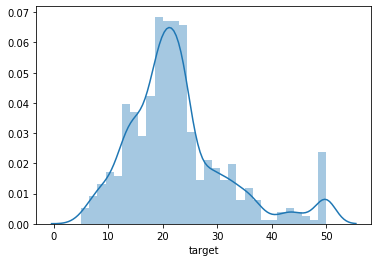

In [18]:
sns.distplot(bos['target'], bins=30)
plt.show()

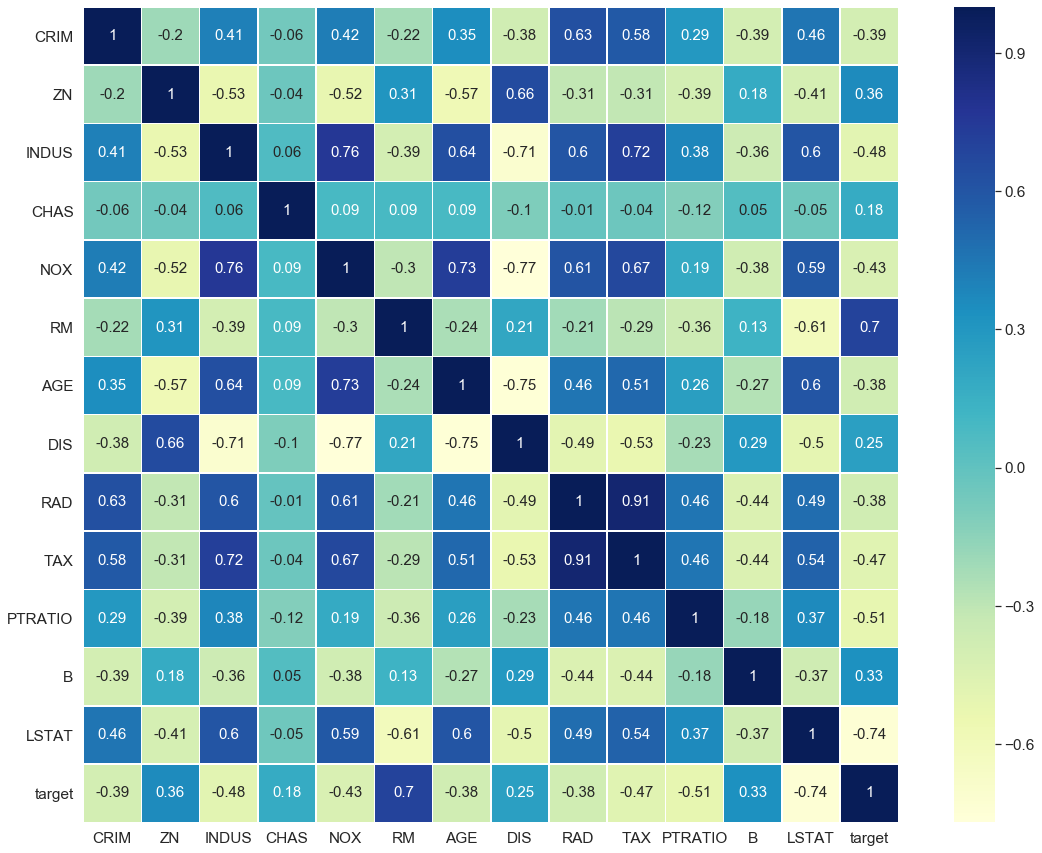

In [50]:
plt.figure(figsize=(20,15))
corr_mat= bos.corr().round(2)
ax=plt.subplot(111)
sns.heatmap(data=corr_mat,annot=True,linewidths=.5,cmap="YlGnBu",square=True,annot_kws={"size": 15},ax=ax)


RAD and TAX are highly correlated , so we don't include this in our features together to avoid multi-colinearity
From the above coorelation plot we can see that MEDV is strongly correlated to LSTAT, RM

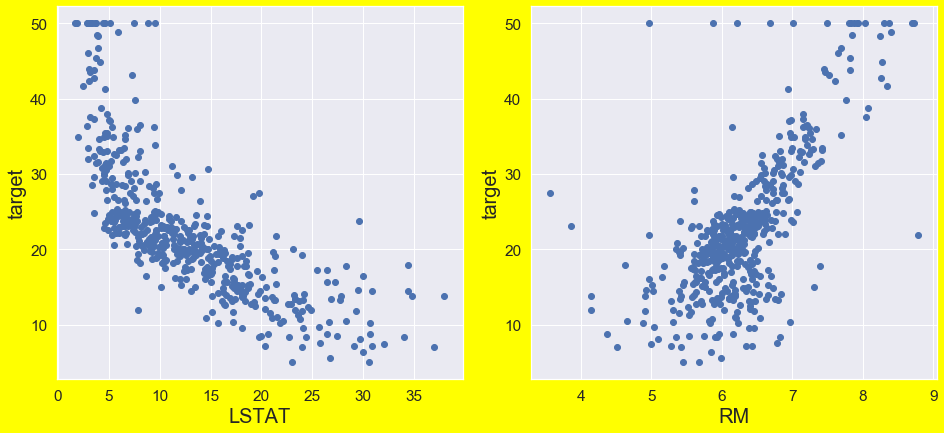

In [70]:
plt.figure(figsize=(20,30), facecolor='yellow')
plotnumber = 1
features=bos[['LSTAT', 'RM']]
target= bos['target']


for column in features:
    if plotnumber<=15 :
        ax = plt.subplot(5,3,plotnumber)
        plt.scatter(features[column],target)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('target',fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [85]:
X = pd.DataFrame(np.c_[bos['LSTAT'], bos['RM']], columns = ['LSTAT','RM'])
Y=bos['target']


In [92]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state=5)


In [99]:
print(X_train.shape,"\n",Y_train.shape,"\n",X_test.shape,"\n",Y_test.shape)


(379, 2) 
 (379,) 
 (127, 2) 
 (127,)


In [107]:
lin_mod=LinearRegression()
lin_mod.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [110]:
print("intercept:",lin_mod.intercept_)
print("cofficient:",lin_mod.coef_)

intercept: 0.18582215623610665
cofficient: [-0.67758923  4.91580979]


In [118]:
Y_train_predict =lin_mod.predict(X_train)
# root mean square error of the model
rmse_train = (np.sqrt(mean_squared_error(Y_train, Y_train_predict)))

# r-squared score of the model
r2_train= r2_score(Y_train, Y_train_predict)
print("r2 value for train dataset:",r2_train,"\n","RMSE value for train dataset:",rmse_train)

r2 value for train dataset: 0.6405777809852186 
 RMSE value for train dataset: 5.526318132474909


In [120]:
Y_test_predict = lin_mod.predict(X_test)
# root mean square error of the model
rmse_test= (np.sqrt(mean_squared_error(Y_test, Y_test_predict)))

# r-squared score of the model
r2_test= r2_score(Y_test, Y_test_predict)
print("r2 value for test datase:",r2_test,"\n","RMSE value for test datase",rmse_test)

r2 value for test datase: 0.62936546386843 
 RMSE value for test datase 5.531063432513128


In [124]:
# saving the model to the local file system
filename = 'BOSTON _PRICE_PRIDICTION.pickle'
pickle.dump(lin_mod, open(filename, 'wb'))